In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

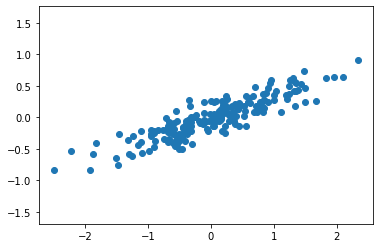

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### Custom defined PCA

In [3]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        
    def fit(self, X):
        # calculate the mean of each column
        M = np.mean(X, axis=0)
        # center columns by subtracting column means
        C = X - M
        # calculate covariance matrix of centered matrix
        V = np.cov(C.T)
        # eigendecomposition of covariance matrix
        values, vectors = np.linalg.eig(V)
        
        # sort by eigenvalues
        eig_pairs = [(np.abs(values[i]), vectors[:, i]) for i in range(len(values))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        self.mean_ = M
        self.C = C
        self.explained_variance_ = np.hstack([eig_pairs[i][0] for i in range(self.n_components)])
        self.components_ = np.vstack([eig_pairs[i][1] for i in range(self.n_components)])
        
    def transform(self, X):
        # projected data
        P = np.dot(self.C, self.components_.T)
        return P

In [4]:
mypca = MyPCA(n_components=1)
mypca.fit(X)

In [5]:
print(mypca.explained_variance_)

[0.7625315]


In [6]:
print(mypca.components_)

[[0.94446029 0.32862557]]


In [7]:
print(mypca.mean_)

[ 0.03351168 -0.00408072]


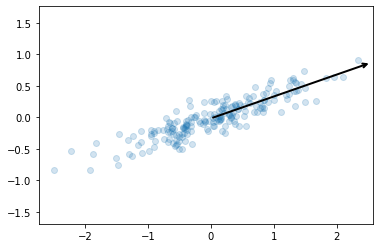

In [8]:
def draw(pca):
    def draw_vector(v0, v1, ax=None):
        ax = ax or plt.gca()
        arrowprops=dict(arrowstyle='->',
                        linewidth=2,
                        shrinkA=0, shrinkB=0)
        ax.annotate('', v1, v0, arrowprops=arrowprops)

    # plot data
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    plt.axis('equal');
    
draw(mypca)

In [9]:
X_mypca = mypca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_mypca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


### sklearn PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(pca.explained_variance_)

[0.7625315]


In [13]:
print(pca.components_)

[[-0.94446029 -0.32862557]]


In [14]:
print(pca.mean_)

[ 0.03351168 -0.00408072]


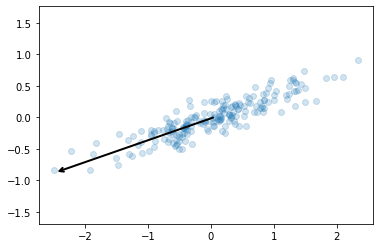

In [15]:
draw(pca)

In [16]:
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


In [17]:
# difference between two pca-ed data
np.sum((np.abs(X_mypca) - np.abs(X_pca)) ** 2)

8.034528338152832e-31